<a href="https://colab.research.google.com/github/justxperimenting/ML-Project/blob/main/Ipl_win_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
match = pd.read_csv('/content/drive/MyDrive/IPL_Dataset/matches.csv')
delivery = pd.read_csv('/content/drive/MyDrive/IPL_Dataset/deliveries.csv')

In [ ]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
match.shape

(1095, 20)

In [ ]:
delivery.shape

(260920, 17)

we can see that in delivery.csv, there are total_runs column which means the total runs scored in that purticular ball , therefore we will group 'match_id' and 'inning' columns and sum all the contents of 'total_runs' column for that group

In [ ]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [ ]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2212,1426310,2,174
2213,1426311,1,175
2214,1426311,2,139
2215,1426312,1,113


In [ ]:
"""
We only want to get the total runs scored in first inning of every match as we want to see the target set for second team
"""
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [ ]:
"""
Combining the total_score_df with match dataframe to get the target runs for each match
"""
match_df = match.merge(total_score_df[['match_id', 'total_runs']],left_on='id',right_on='match_id')

In [ ]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [ ]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

Now we will remove those teams that are defunct now, also we will replace teams which had old names to their new names:

* Delhi Daredevils by Delhi Capitals
* Gujarat Lions by Gujarat Titans
* Kings XI Punjab by Punjab Kings
* Deccan Chargers by Sunrisers Hyderabad

In [ ]:
teams = ['Sunrisers Hyderabad',
         'Mumbai Indians',
         'Royal Challengers Bangalore',
         'Kolkata Knight Riders',
         'Punjab Kings',
         'Chennai Super Kings',
         'Rajasthan Royals',
         'Delhi Capitals',
         'Gujarat Titans',
         'Lucknow Super Giants']

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Gujarat Lions','Gujarat Titans')
match_df['team2'] = match_df['team2'].str.replace('Gujarat Lions','Gujarat Titans')

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


In [ ]:
# making sure that match_df has only those teams which are present in 'teams' list
# this removes all the defunctant teams
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]


In [ ]:
match_df.shape

(991, 22)

In [ ]:
"""
1. pd.set_option('display.max_columns', None):
Purpose: This line sets the maximum number of columns to be displayed when printing a DataFrame.
'display.max_columns': This is the option name that controls the column display limit.
None: Setting the value to None means that there will be no limit on the number of columns displayed. All columns of the DataFrame will be shown, even if there are many.

2. pd.set_option('display.expand_frame_repr', False) :
Purpose: This line, if uncommented, would control how the DataFrame is displayed in the output when it has a large number of rows or columns that cannot fit on the screen.
'display.expand_frame_repr': This is the option name.
False: Setting it to False would cause the DataFrame to be truncated and displayed with ellipses (...) to indicate the hidden parts. The default behavior is to wrap the DataFrame to multiple lines, which might not be desirable in some cases.
In this case, this line is commented out which keeps default behavior to expand the dataframe to multiple lines.

3. pd.set_option('display.max_colwidth', None):
Purpose: This line, if uncommented, would set the maximum width of each column when displaying the DataFrame.
'display.max_colwidth': This is the option name.
None: Setting it to None would mean there is no limit on the column width, allowing the full content of each cell to be displayed.
As it is commented out, the default column width for display would be applied, which may truncate columns that are too wide and hide some of the column content.
"""

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1426305,2024,Mumbai,2024-05-17,League,N Pooran,"Wankhede Stadium, Mumbai",Lucknow Super Giants,Mumbai Indians,Mumbai Indians,field,Lucknow Super Giants,runs,18.0,215.0,20.0,N,NaN,Navdeep Singh,R Pandit,1426305,214
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyderabad",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [ ]:
match_df['method'].value_counts()

,count
method,
D/L,17


In [ ]:
match_df['method'].dtype

dtype('O')

In [ ]:
# removing matches where the result is due to D/L method
match_df = match_df[match_df['method'] != 'D/L']

In [ ]:
match_df.shape

(974, 22)

In [ ]:
match_df_new = match_df[['match_id','city','winner','total_runs']]
match_df_new

,match_id,city,winner,total_runs
0,335982,Bangalore,Kolkata Knight Riders,222
1,335983,Chandigarh,Chennai Super Kings,240
2,335984,Delhi,Delhi Daredevils,129
3,335985,Mumbai,Royal Challengers Bangalore,165
4,335986,Kolkata,Kolkata Knight Riders,110
...,...,...,...,...
1088,1426305,Mumbai,Lucknow Super Giants,214
1090,1426307,Hyderabad,Sunrisers Hyderabad,214
1091,1426309,Ahmedabad,Kolkata Knight Riders,159
1093,1426311,Chennai,Sunrisers Hyderabad,175


In [ ]:
delivery_df = delivery
delivery_df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [ ]:
delivery_df['batting_team'] = delivery_df['batting_team'].str.replace('Delhi Daredevils','Delhi Capitals')
delivery_df['bowling_team'] = delivery_df['bowling_team'].str.replace('Delhi Daredevils','Delhi Capitals')

delivery_df['batting_team'] = delivery_df['batting_team'].str.replace('Gujarat Lions','Gujarat Titans')
delivery_df['bowling_team'] = delivery_df['bowling_team'].str.replace('Gujarat Lions','Gujarat Titans')

delivery_df['batting_team'] = delivery_df['batting_team'].str.replace('Kings XI Punjab','Punjab Kings')
delivery_df['bowling_team'] = delivery_df['bowling_team'].str.replace('Kings XI Punjab','Punjab Kings')

delivery_df['batting_team'] = delivery_df['batting_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery_df['bowling_team'] = delivery_df['bowling_team'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


delivery_df = delivery_df[delivery_df['batting_team'].isin(teams)]
delivery_df = delivery_df[delivery_df['bowling_team'].isin(teams)]

In [ ]:
delivery_df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Punjab Kings', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [ ]:
delivery_df = match_df_new.merge(delivery, on = 'match_id')

In [ ]:
delivery_df = delivery_df[delivery_df['inning'] == 2]
# we did this as we want to focus on  2nd inning

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233504,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
233505,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
233506,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
233507,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [ ]:
# Convert 'total_runs_y' to a numeric dtype before calculating the cumulative sum.
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'])

# Now, calculate the cumulative sum.
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233504,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,110
233505,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,111
233506,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,112
233507,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,113


In [ ]:
# we will make a column named : runs_left
delivery_df['total_runs_x'] = delivery_df['total_runs_x'] + 1;
delivery_df = delivery_df.rename(columns = {"total_runs_x" : 'target_runs'})
delivery_df['runs_left'] = delivery_df['target_runs'] - delivery_df['current_score']

In [ ]:
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1,222
125,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2,221
126,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2,221
127,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3,220
128,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233504,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,110,4
233505,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,111,3
233506,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,112,2
233507,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,113,1


In [ ]:
# we are now finding the balls_left
delivery_df['balls_left'] = 120 - (delivery_df['over']*6 + delivery_df['ball'])

In [ ]:
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,1,222,119
125,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN,2,221,118
126,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN,2,221,117
127,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN,3,220,116
128,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN,4,219,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233504,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,110,4,61
233505,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,111,3,60
233506,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN,112,2,59
233507,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN,113,1,58


In [ ]:
#  now we have to find wickets_left column
delivery_df['player_dismissed'].dtype

dtype('O')

In [ ]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].notna().astype(int)
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets_left'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
124,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,0,NaN,NaN,1,222,119,10
125,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,0,NaN,NaN,2,221,118,10
126,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,0,NaN,NaN,2,221,117,10
127,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,0,NaN,NaN,3,220,116,10
128,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,0,NaN,NaN,4,219,115,10


In [ ]:
# crr = runs/overs
delivery_df['crr'] = ( delivery_df['current_score'] * 6 )/(120 - delivery_df['balls_left'])

In [ ]:
delivery_df['crr']

,crr
124,6.000000
125,6.000000
126,4.000000
127,4.500000
128,4.800000
...,...
233504,11.186441
233505,11.100000
233506,11.016393
233507,10.935484


In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left'] / delivery_df['balls_left']) * 6
delivery_df['rrr']

,rrr
124,11.193277
125,11.237288
126,11.333333
127,11.379310
128,11.426087
...,...
233504,0.393443
233505,0.300000
233506,0.203390
233507,0.103448


In [ ]:
def result(row):
  return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
delivery_df['result'] = delivery_df.apply(result, axis = 1) # #i should know the meaning of this line of code
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,0,NaN,NaN,1,222,119,10,6.000000,11.193277,0
125,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,0,NaN,NaN,2,221,118,10,6.000000,11.237288,0
126,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,0,NaN,NaN,2,221,117,10,4.000000,11.333333,0
127,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,0,NaN,NaN,3,220,116,10,4.500000,11.379310,0
128,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,0,NaN,NaN,4,219,115,10,4.800000,11.426087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233504,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,0,NaN,NaN,110,4,61,8,11.186441,0.393443,1
233505,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,0,NaN,NaN,111,3,60,8,11.100000,0.300000,1
233506,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,0,NaN,NaN,112,2,59,8,11.016393,0.203390,1
233507,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,0,NaN,NaN,113,1,58,8,10.935484,0.103448,1


In [ ]:
final_df = delivery_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'target_runs', 'crr', 'rrr', 'result']]

In [ ]:
final_df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Sunrisers Hyderabad', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [ ]:
final_df.shape

(112925, 10)

In [ ]:
# we will shuffle this sample as it will help to remove bias.
final_df = final_df.sample(final_df.shape[0])

In [ ]:
final_df.isna().sum()

,0
batting_team,0
bowling_team,0
city,6012
runs_left,0
balls_left,0
wickets_left,0
target_runs,0
crr,0
rrr,16
result,0


In [ ]:
"""
our final_df has na values in some columns , therefore we will remove those form data
"""
final_df.dropna(inplace = True)
final_df.shape

(106897, 10)

In [ ]:
final_df = final_df[final_df['balls_left'] != 0]
final_df.shape

(106544, 10)

In [ ]:
X = final_df.iloc[:, :-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)


In [ ]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,target_runs,crr,rrr
110518,Gujarat Titans,Royal Challengers Bangalore,Rajkot,62,43,8,181,9.272727,8.651163
63734,Delhi Capitals,Punjab Kings,Dharamsala,25,37,8,142,8.457831,4.054054
30818,Punjab Kings,Rajasthan Royals,Chandigarh,99,74,9,184,11.086957,8.027027
24531,Royal Challengers Bangalore,Delhi Capitals,Johannesburg,75,57,9,135,5.714286,7.894737
168480,Chennai Super Kings,Punjab Kings,Abu Dhabi,123,97,10,154,8.086957,7.608247
...,...,...,...,...,...,...,...,...,...
91994,Chennai Super Kings,Royal Challengers Bangalore,Bangalore,102,95,10,155,12.720000,6.442105
192870,Delhi Capitals,Rajasthan Royals,Mumbai,166,81,8,223,8.769231,12.296296
111422,Kolkata Knight Riders,Delhi Capitals,Delhi,167,104,10,187,7.500000,9.634615
11252,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,79,43,7,166,6.779221,11.023256


In [ ]:
"""
A problem can arise : our 1st 3 columns are strings
Therefore , we will use One Hot Encoding on these
"""
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output =False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder = 'passthrough')


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7951100473978131

In [ ]:
delivery_df

,match_id,city,winner,target_runs,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,0,NaN,NaN,1,222,119,10,6.000000,11.193277,0
125,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,0,NaN,NaN,2,221,118,10,6.000000,11.237288,0
126,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,0,NaN,NaN,2,221,117,10,4.000000,11.333333,0
127,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,0,NaN,NaN,3,220,116,10,4.500000,11.379310,0
128,335982,Bangalore,Kolkata Knight Riders,223,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,0,NaN,NaN,4,219,115,10,4.800000,11.426087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233504,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,0,NaN,NaN,110,4,61,8,11.186441,0.393443,1
233505,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,0,NaN,NaN,111,3,60,8,11.100000,0.300000,1
233506,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,0,NaN,NaN,112,2,59,8,11.016393,0.203390,1
233507,1426312,Chennai,Kolkata Knight Riders,114,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,0,NaN,NaN,113,1,58,8,10.935484,0.103448,1


In [ ]:
def match_progression(x_df,match_id,pipe):
  match = x_df[x_df['match_id'] == match_id]
  match = match[(match['ball'] == 6)]
  temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','target_runs','crr','rrr']].dropna()

  temp_df = temp_df[temp_df['balls_left'] != 0]
  result = pipe.predict_proba(temp_df)
  temp_df['lose'] = np.round(result.T[0]*100,1)
  temp_df['win'] = np.round(result.T[1]*100,1)
  temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

  target = temp_df['target_runs'].values[0]
  runs = list(temp_df['runs_left'].values)
  new_runs = runs[:]
  runs.insert(0,target)
  temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
  wickets = list(temp_df['wickets_left'].values)
  new_wickets = wickets[:]
  new_wickets.insert(0,10)
  wickets.append(0)
  w = np.array(wickets)
  nw = np.array(new_wickets)
  temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

  print("Target-",target)
  temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
  return temp_df,target

In [ ]:
temp_df,target = match_progression(delivery_df,829713,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
94809,1,1,0,48.3,51.7
94815,2,4,0,48.2,51.8
94821,3,13,0,38.5,61.5
94827,4,5,0,38.1,61.9
94833,5,6,1,49.5,50.5
94839,6,12,0,41.6,58.4
94845,7,6,0,40.3,59.7
94851,8,9,2,61.6,38.4
94857,9,10,0,56.1,43.9
94863,10,11,0,49.5,50.5


Text(0.5, 1.0, 'Target-178')

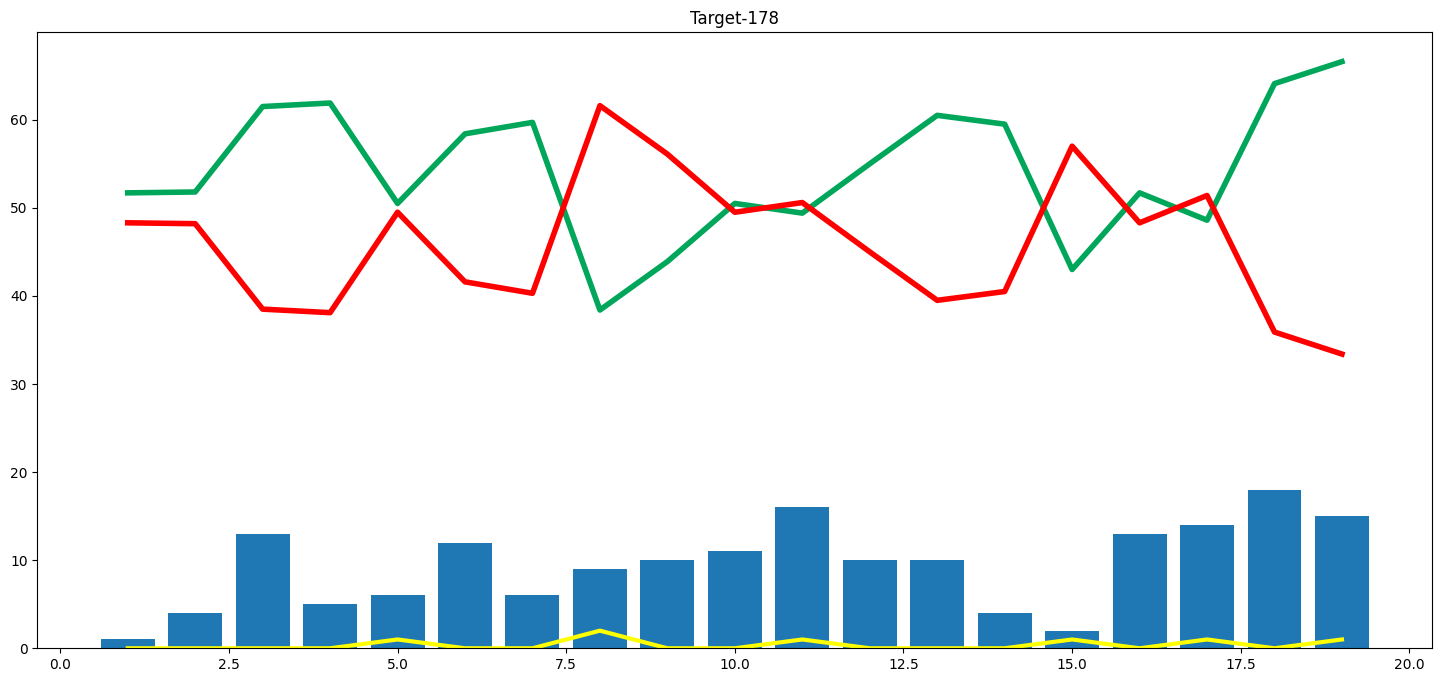

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= (18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color = 'yellow', linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df["win"],color = '#00a65a', linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df["lose"],color = 'red', linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
teams


['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Gujarat Titans',
 'Lucknow Super Giants']

In [ ]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Rajkot', 'Kanpur', 'Bengaluru', 'Indore', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))